In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 21.9 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_objectron = mp.solutions.objectron
mp_selfie_segmentation = mp.solutions.selfie_segmentation

mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=3, circle_radius=2)
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import os

# Used: 0, 40, 39, 8, 4, 15

vid_name = os.listdir('drive/MyDrive/Test/Video')[::-1][4]
vid_name

'124.Fake WebCam HD For Video Omegle - Face Cut boyl # 120.mp4'

In [ ]:
!rm -rf /content/frames
!mkdir /content/frames
import cv2
import numpy as np
from PIL import Image
from glob import glob

vidcap = cv2.VideoCapture(f"/content/drive/MyDrive/Test/Video/{vid_name}")
success,image = vidcap.read()
count = 0


while success:
  cv2.imwrite("/content/frames/frame%05d.png" % count, image)
  success,image = vidcap.read()
  count += 1
  if count == 20:
    break

In [ ]:
from natsort import natsorted
from glob import glob

file_list = glob('/content/frames/*.png')
file_list_sorted = natsorted(file_list, reverse=False)

In [ ]:
# Run MediaPipe Face Detection with short range model.
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
from PIL import Image

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

def create_collage(name, width, height, listofimages):
    cols = 5
    rows = 2
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            print(i, x, y)
            new_im.paste(ims[i], (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0

    new_im.save(f"{name}.jpg")

Face detections of /content/frames/frame00000.png:


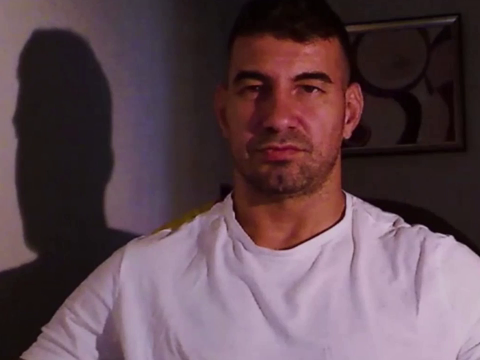

==> frame00000.png


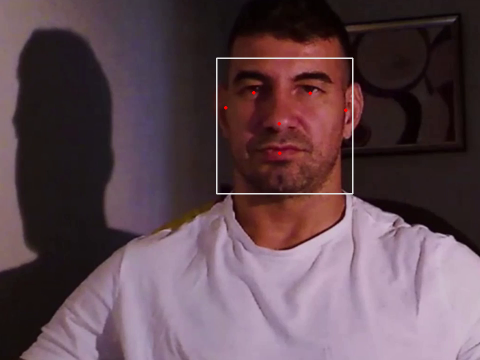

Face detections of /content/frames/frame00001.png:


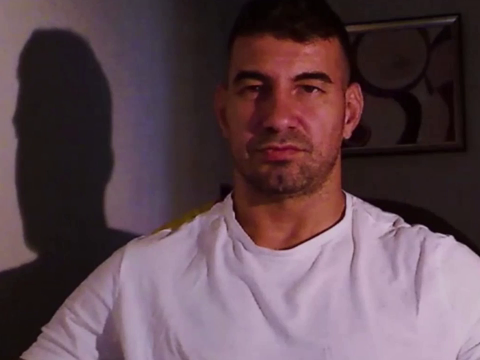

==> frame00001.png


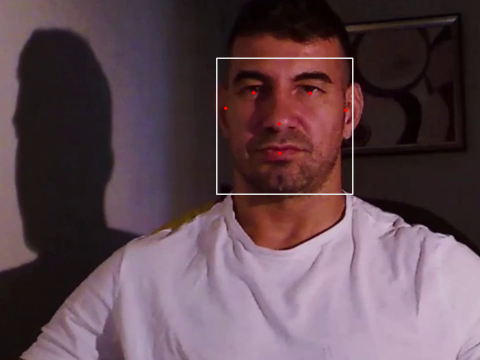

Face detections of /content/frames/frame00002.png:


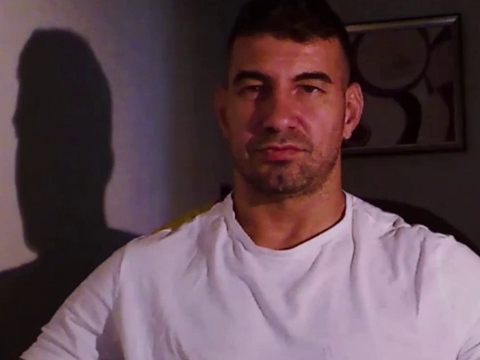

==> frame00002.png


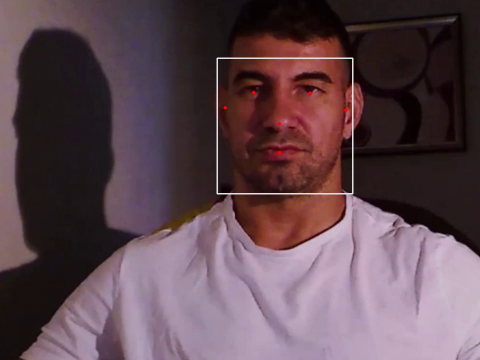

Face detections of /content/frames/frame00003.png:


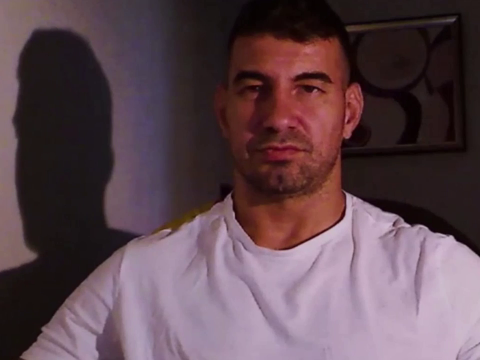

==> frame00003.png


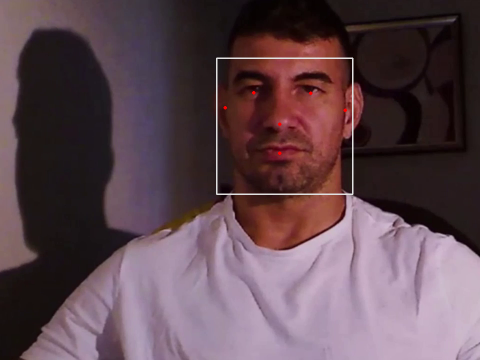

Face detections of /content/frames/frame00004.png:


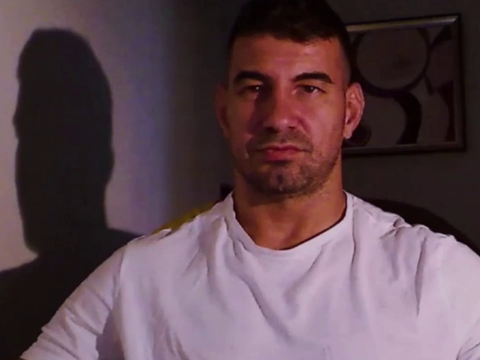

==> frame00004.png


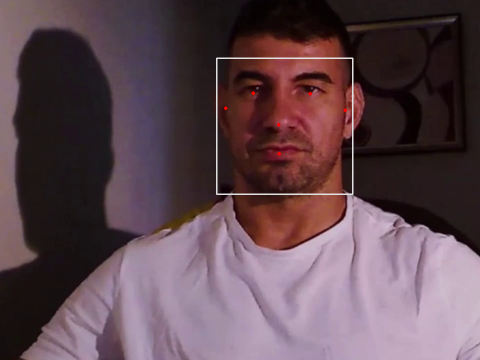

Face detections of /content/frames/frame00005.png:


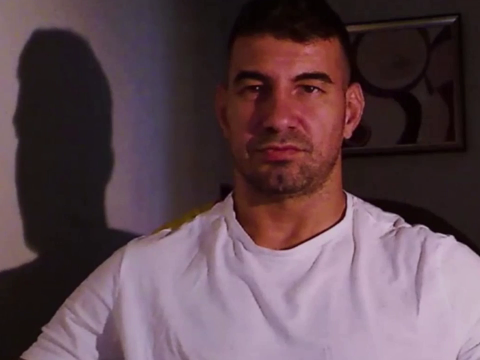

==> frame00005.png


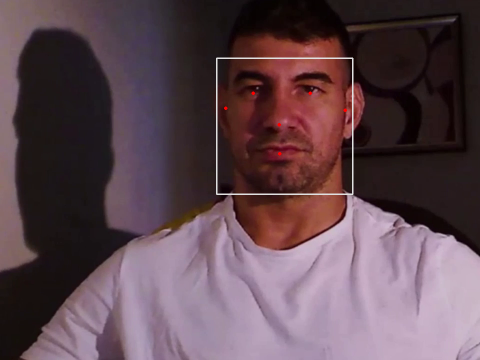

Face detections of /content/frames/frame00006.png:


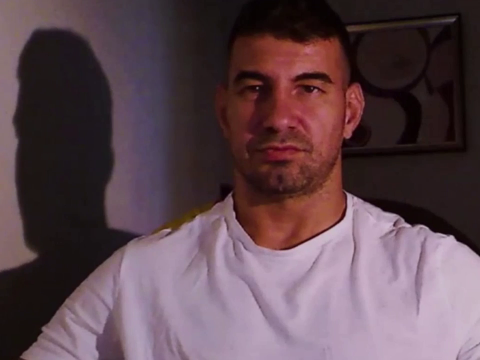

==> frame00006.png


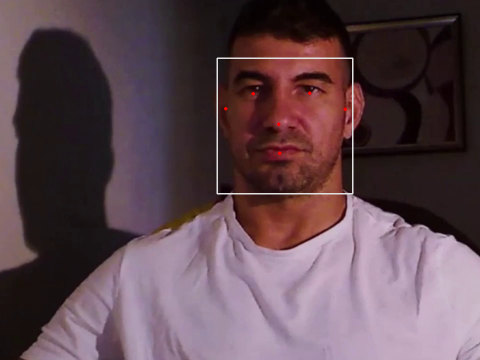

Face detections of /content/frames/frame00007.png:


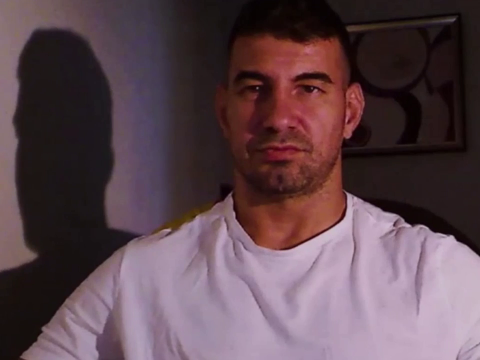

==> frame00007.png


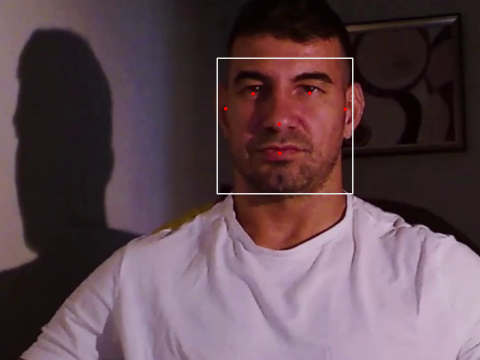

Face detections of /content/frames/frame00008.png:


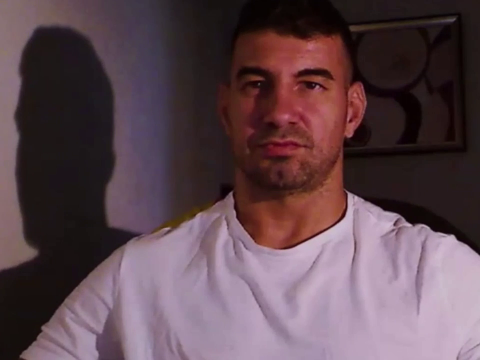

==> frame00008.png


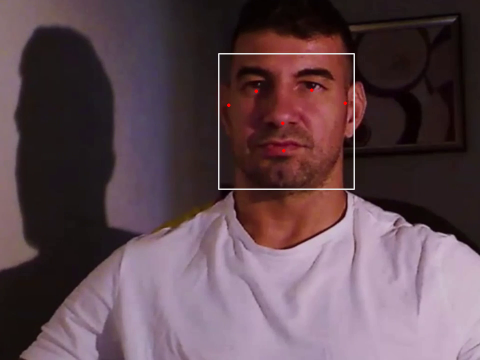

Face detections of /content/frames/frame00009.png:


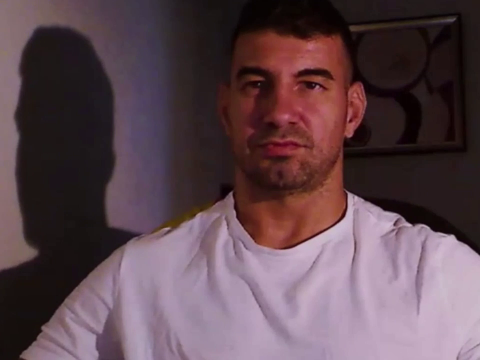

==> frame00009.png


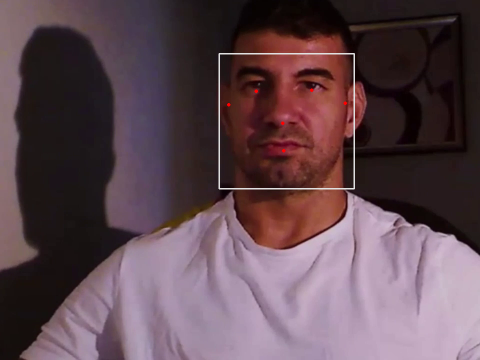

In [ ]:
!mkdir /content/fd

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  for name in file_list_sorted[:10]:
    image = cv2.imread(name)
    
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    resize_and_show(annotated_image)
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    print("==>", name.split('/')[-1])
    cv2.imwrite(f"/content/fd/{name.split('/')[-1]}", annotated_image)
    resize_and_show(annotated_image)

Face landmarks of /content/frames/frame00000.png:


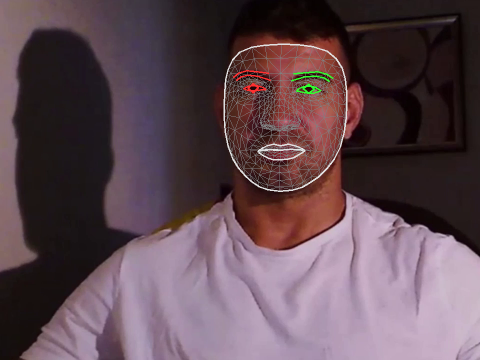

Face landmarks of /content/frames/frame00001.png:


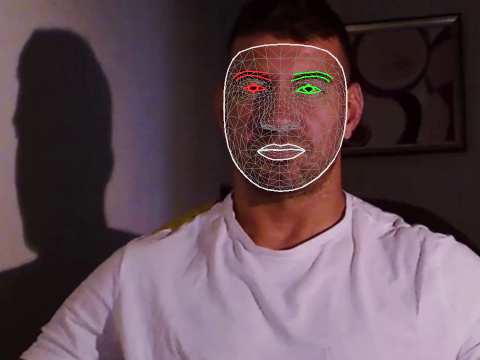

Face landmarks of /content/frames/frame00002.png:


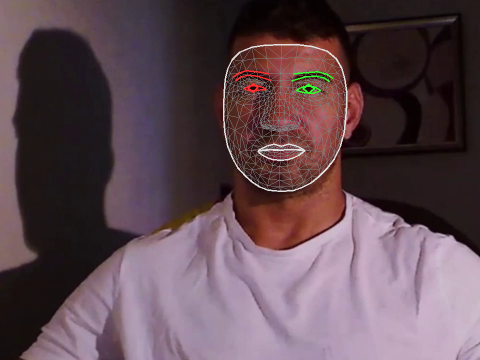

Face landmarks of /content/frames/frame00003.png:


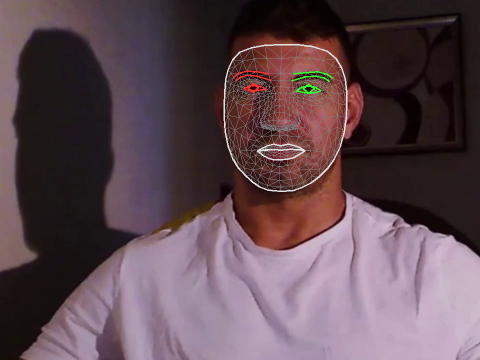

Face landmarks of /content/frames/frame00004.png:


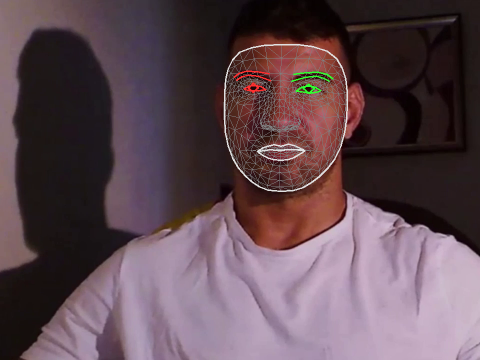

Face landmarks of /content/frames/frame00005.png:


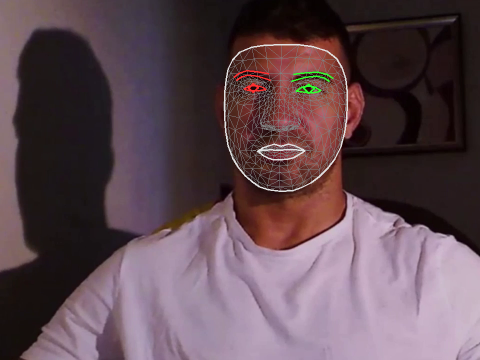

Face landmarks of /content/frames/frame00006.png:


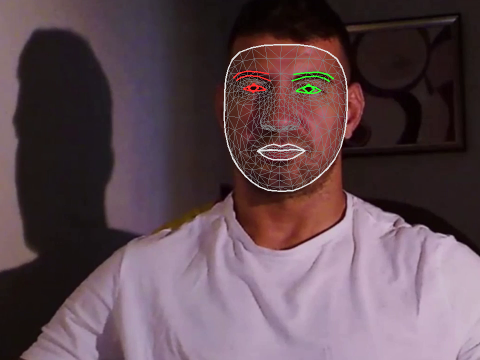

Face landmarks of /content/frames/frame00007.png:


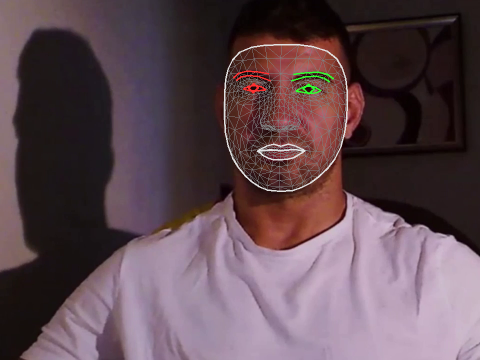

Face landmarks of /content/frames/frame00008.png:


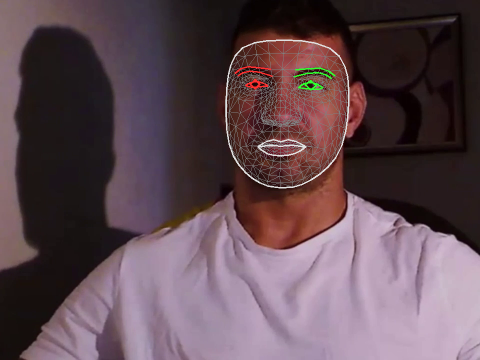

Face landmarks of /content/frames/frame00009.png:


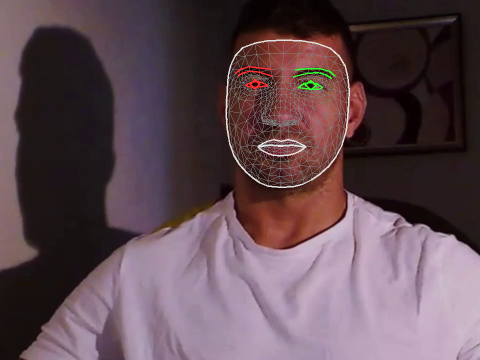

In [ ]:
!mkdir /content/fm

# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name in file_list_sorted[:10]:
    image = cv2.imread(name)
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite(f"/content/fm/{name.split('/')[-1]}", annotated_image)
    resize_and_show(annotated_image)

In [ ]:
!mkdir /content/fo

with mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=5,
    min_detection_confidence=0.5,
    model_name='Shoe') as objectron:
  # Run inference on shoe images.
  for name in file_list_sorted[:10]:
    image = cv2.imread(name)
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {name}')
      continue
    print(f'Box landmarks of {name}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
    cv2.imwrite(f"/content/fo/{name.split('/')[-1]}", annotated_image)
    cv2_imshow(annotated_image)

No box landmarks detected on /content/frames/frame00000.png
No box landmarks detected on /content/frames/frame00001.png
No box landmarks detected on /content/frames/frame00002.png
No box landmarks detected on /content/frames/frame00003.png
No box landmarks detected on /content/frames/frame00004.png
No box landmarks detected on /content/frames/frame00005.png
No box landmarks detected on /content/frames/frame00006.png
No box landmarks detected on /content/frames/frame00007.png
No box landmarks detected on /content/frames/frame00008.png
No box landmarks detected on /content/frames/frame00009.png


Segmentation mask of /content/frames/frame00000.png:


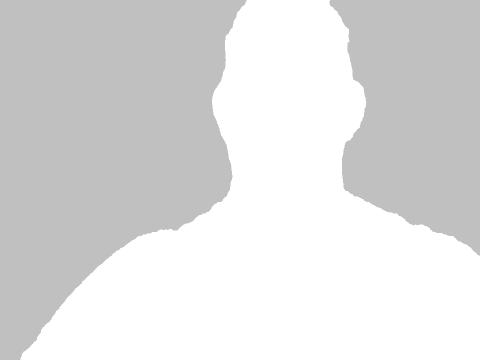

Segmentation mask of /content/frames/frame00001.png:


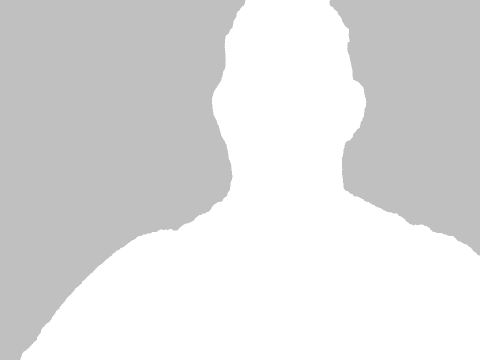

Segmentation mask of /content/frames/frame00002.png:


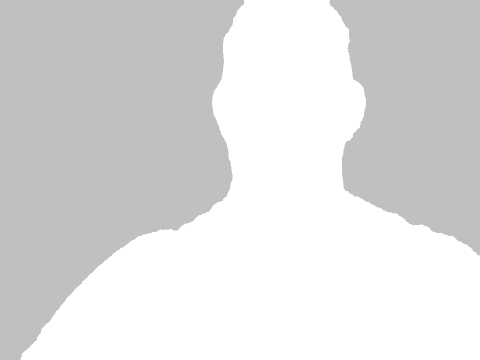

Segmentation mask of /content/frames/frame00003.png:


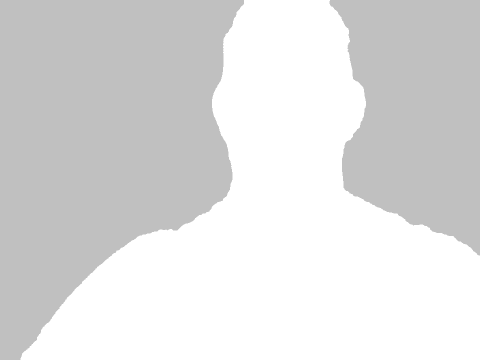

Segmentation mask of /content/frames/frame00004.png:


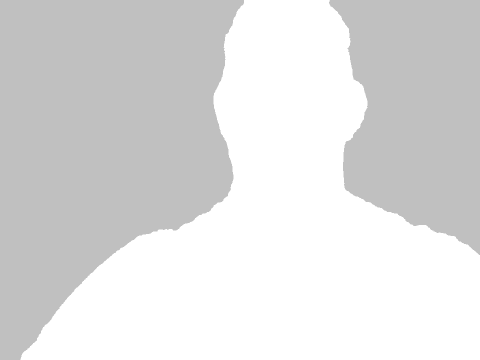

Segmentation mask of /content/frames/frame00005.png:


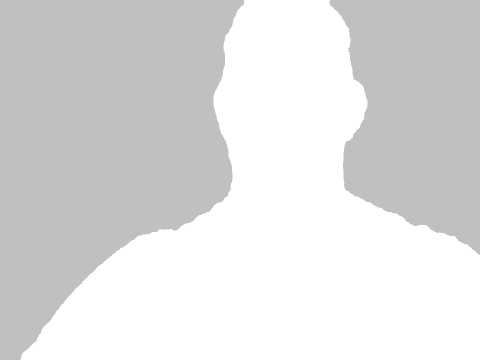

Segmentation mask of /content/frames/frame00006.png:


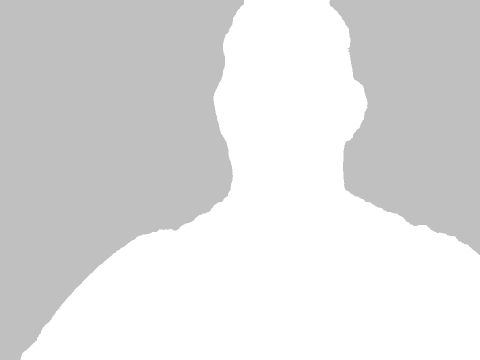

Segmentation mask of /content/frames/frame00007.png:


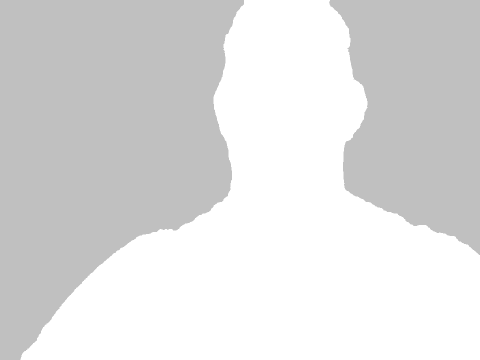

Segmentation mask of /content/frames/frame00008.png:


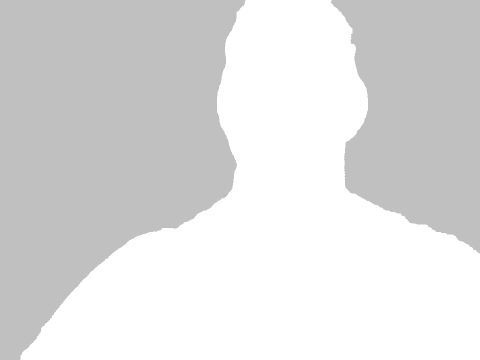

Segmentation mask of /content/frames/frame00009.png:


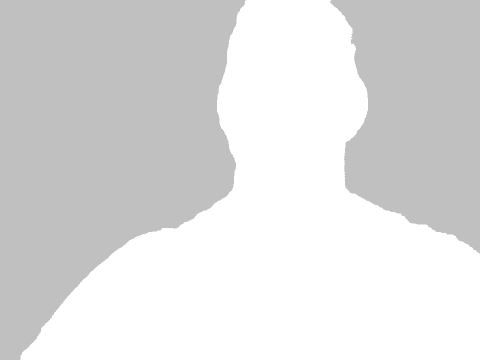

In [ ]:
!mkdir /content/fseg

# Show segmentation masks.
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white

with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name in file_list_sorted[:10]:
    image = cv2.imread(name)
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate solid color images for showing the output selfie segmentation mask.
    fg_image = np.zeros(image.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f'Segmentation mask of {name}:')
    cv2.imwrite(f"/content/fseg/{name.split('/')[-1]}", output_image)
    resize_and_show(output_image)

0 0 0
1 0 150
2 160 0
3 160 150
4 320 0
5 320 150
6 480 0
7 480 150
8 640 0
9 640 150


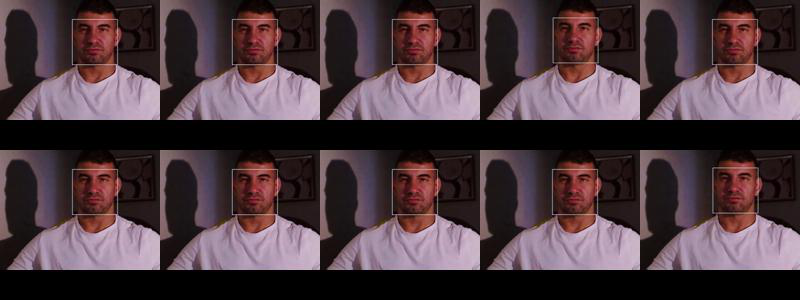

In [ ]:
from glob import glob
create_collage("face-detection", 800, 300, glob("/content/fd/*.png"))
Image.open("/content/face-detection.jpg")

0 0 0
1 0 150
2 160 0
3 160 150
4 320 0
5 320 150
6 480 0
7 480 150
8 640 0
9 640 150


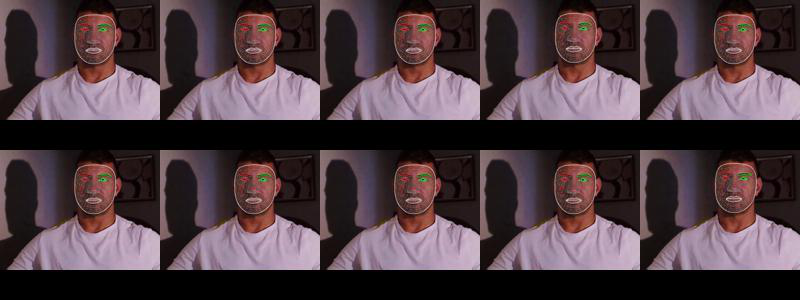

In [ ]:
from glob import glob
create_collage("face-mesh", 800, 300, glob("/content/fm/*.png"))
Image.open("/content/face-mesh.jpg")

0 0 0
1 0 150
2 160 0
3 160 150
4 320 0
5 320 150
6 480 0
7 480 150
8 640 0
9 640 150


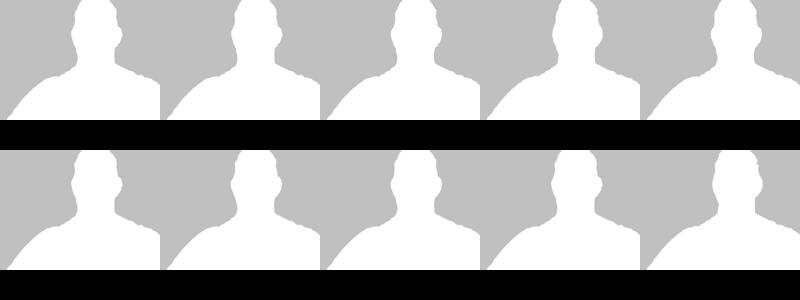

In [ ]:
from glob import glob
create_collage("face-seg", 800, 300, glob("/content/fseg/*.png"))
Image.open("/content/face-seg.jpg")

In [ ]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1693, 256) # First fully connected layer
        self.fc_hidden = nn.ModuleList([nn.Linear(256, 256) for i in range(16)]) # Hidden layers
        self.fc_out = nn.Linear(256, 5) # Output layer
        self.softmax = nn.Softmax(dim=1) # Softmax layer for classification

    def forward(self, x1, x2, x3):
        x = torch.cat((x1, x2, x3), 1)
        x = x.view(-1, 1693) # Reshape input to be 1x64
        x = nn.functional.relu(self.fc1(x)) # Apply ReLU activation function to first layer
        for fc in self.fc_hidden:
            x = nn.functional.relu(fc(x)) # Apply ReLU activation function to each hidden layer
        x = self.fc_out(x) # Output layer
        x = self.softmax(x) # Softmax layer for classification
        return x

In [ ]:
model = MLP()

In [ ]:
import torch

# focused / distracted / thinking / neutral / ignoring

inp1 = torch.from_numpy(fd_array)[0]
inp2 = torch.from_numpy(fm_array)[0]
inp3 = torch.from_numpy(sg_array)[0]

# print(inp1.unsqueeze(0).shape, inp2.unsqueeze(0).shape, inp3.unsqueeze(0).shape, inp1.dtype)

model(inp1.unsqueeze(0), inp2.unsqueeze(0), inp3.unsqueeze(0)).shape

NameError: ignored